In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
drver_dataframe = pd.read_csv("driver-data.csv")
drver_dataframe.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [4]:
drver_dataframe = drver_dataframe.drop(columns = ["id"])

In [5]:
drver_dataframe.head()

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


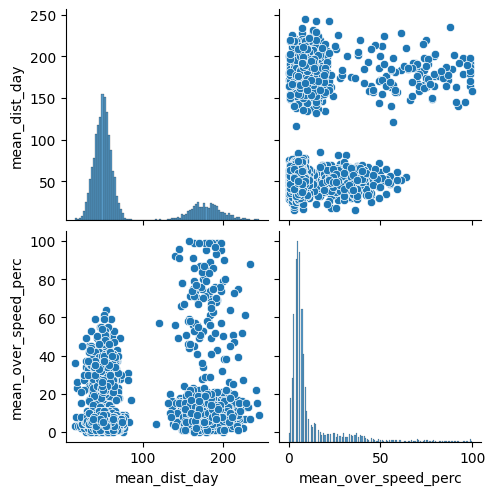

In [6]:
# lets draw a pairplot 
sns.pairplot(drver_dataframe)
plt.show()

now from above the total number of the clusters in given dataset is = 2

## build the kmeans model 

In [7]:
from sklearn.cluster import KMeans

In [8]:
kmeans_driver = KMeans(n_clusters=2)   #n_clusters=8 represens the number of cluster

In [9]:
kmeans_driver.fit(drver_dataframe)    # you can use the train test split but not thee x_train and x_test 

KMeans(n_clusters=2)

In [10]:
print(kmeans_driver.cluster_centers_)

[[ 50.04763438   8.82875   ]
 [180.017075    18.29      ]]


In [11]:
print(kmeans_driver.labels_)

[0 0 0 ... 1 1 1]


In [12]:
drver_dataframe["cluster labels"] = kmeans_driver.labels_

In [13]:
drver_dataframe.head()

,mean_dist_day,mean_over_speed_perc,cluster labels
0,71.24,28,0
1,52.53,25,0
2,64.54,27,0
3,55.69,22,0
4,54.58,25,0


In [14]:
drver_dataframe.tail()

,mean_dist_day,mean_over_speed_perc,cluster labels
3995,160.04,10,1
3996,176.17,5,1
3997,170.91,12,1
3998,176.14,5,1
3999,168.03,9,1


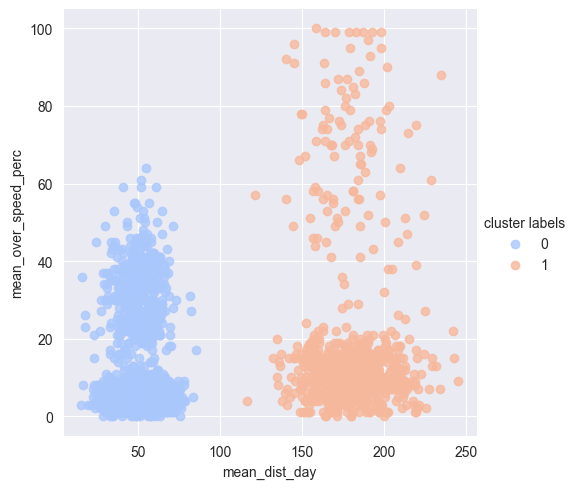

In [15]:
# lets plot the vistualization of the clusters
sns.set_style('darkgrid')
sns.lmplot(x="mean_dist_day",y="mean_over_speed_perc",data=drver_dataframe, hue='cluster labels',
           palette='coolwarm',aspect=1,fit_reg=False)
plt.show()

# elbow method using WCSS

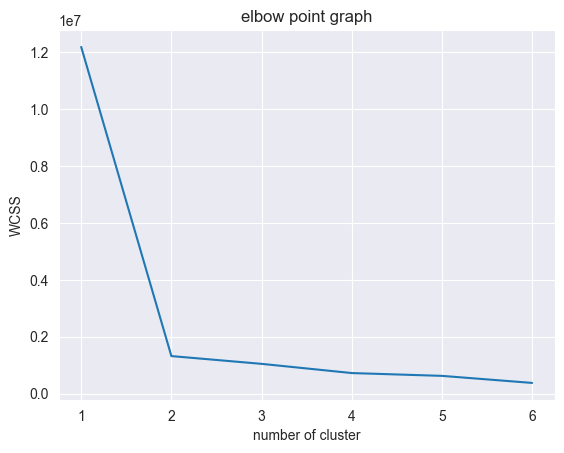

In [16]:
wcss=[]
for i in range(1,7):
    kmeans1 = KMeans(n_clusters=i)
    kmeans1.fit(drver_dataframe)
    wcss.append(kmeans1.inertia_)
#plot the elbow plot 
plt.plot(range(1,7),wcss)
plt.title("elbow point graph")
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.show()

 now in above we can clearly see the elow is at 2 so there are two optimize clusters are there 